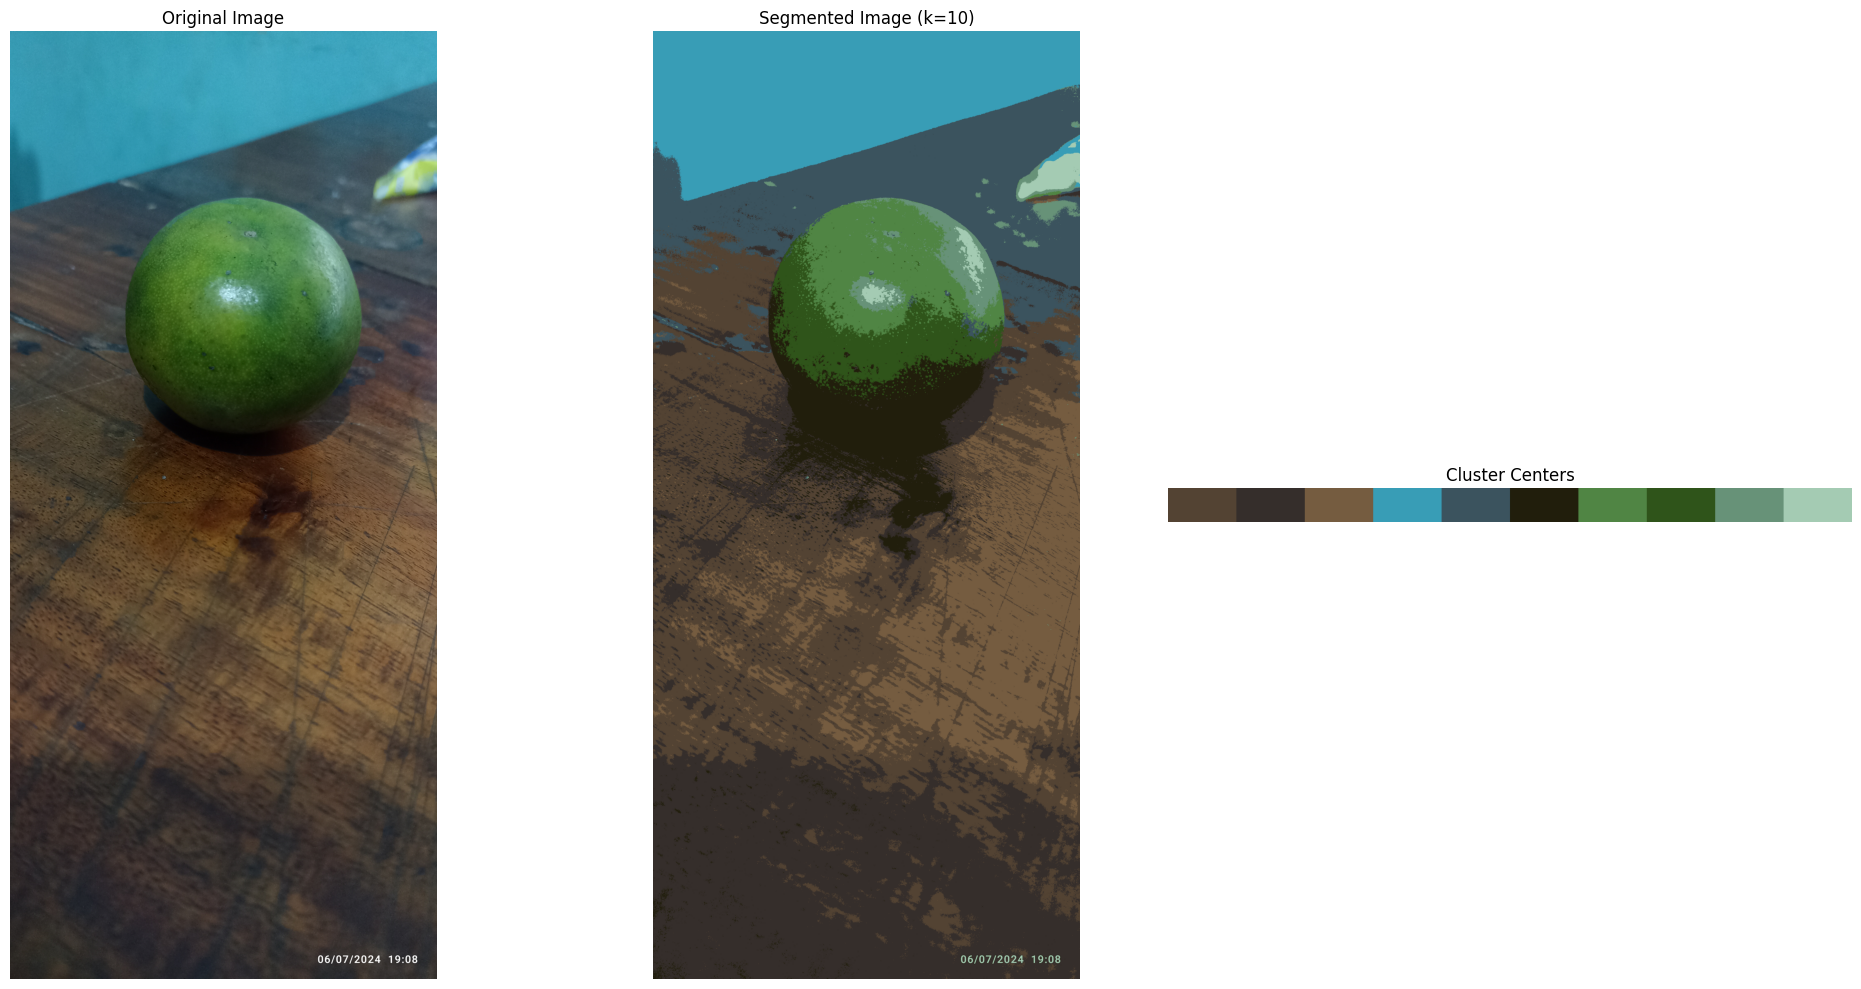

Original Image Size: (4624, 2080, 3)
Segmented Image Size: (4624, 2080, 3)

Cluster Details:
Cluster 6: 2486983 pixels (Color: [83 67 51])
Cluster 8: 2424728 pixels (Color: [53 46 43])
Cluster 1: 1171092 pixels (Color: [117  92  64])
Cluster 5: 1164144 pixels (Color: [ 56 157 182])
Cluster 2: 972961 pixels (Color: [59 83 94])
Cluster 3: 529509 pixels (Color: [33 30 12])
Cluster 7: 355046 pixels (Color: [ 80 133  68])
Cluster 0: 308266 pixels (Color: [47 84 26])
Cluster 4: 138106 pixels (Color: [103 146 120])
Cluster 9: 67085 pixels (Color: [164 203 179])


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

# Membaca gambar
image_path = 'img/jeruk_diatas_meja_kantor.jpg'
image = cv2.imread(image_path)

# Mengubah warna gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image_rgb.reshape((-1, 3))

# Mengonversi ke tipe float
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria untuk k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Menjalankan k-means clustering. anda bisa mengatur angkanya sesuai dengan keinginan anda
k = 10 
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image_rgb.shape))

# Menampilkan gambar hasil clustering
plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title(f'Segmented Image (k={k})')
plt.axis('off')

# Menampilkan warna kluster sebagai bar horizontal
color_counts = Counter(labels.flatten())
sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)

bar_height = 50
bar = np.zeros((bar_height, len(sorted_colors) * 100, 3), dtype=np.uint8)

for i, (cluster_num, count) in enumerate(sorted_colors):
    bar[:, i * 100:(i + 1) * 100] = centers[cluster_num]

plt.subplot(1, 3, 3)
plt.imshow(bar)
plt.title('Cluster Centers')
plt.axis('off')

plt.tight_layout()
plt.show()

# Menampilkan rincian kluster
print(f"Original Image Size: {image_rgb.shape}")
print(f"Segmented Image Size: {segmented_image.shape}")
print("\nCluster Details:")

for cluster_num, count in sorted_colors:
    print(f"Cluster {cluster_num}: {count} pixels (Color: {centers[cluster_num]})")


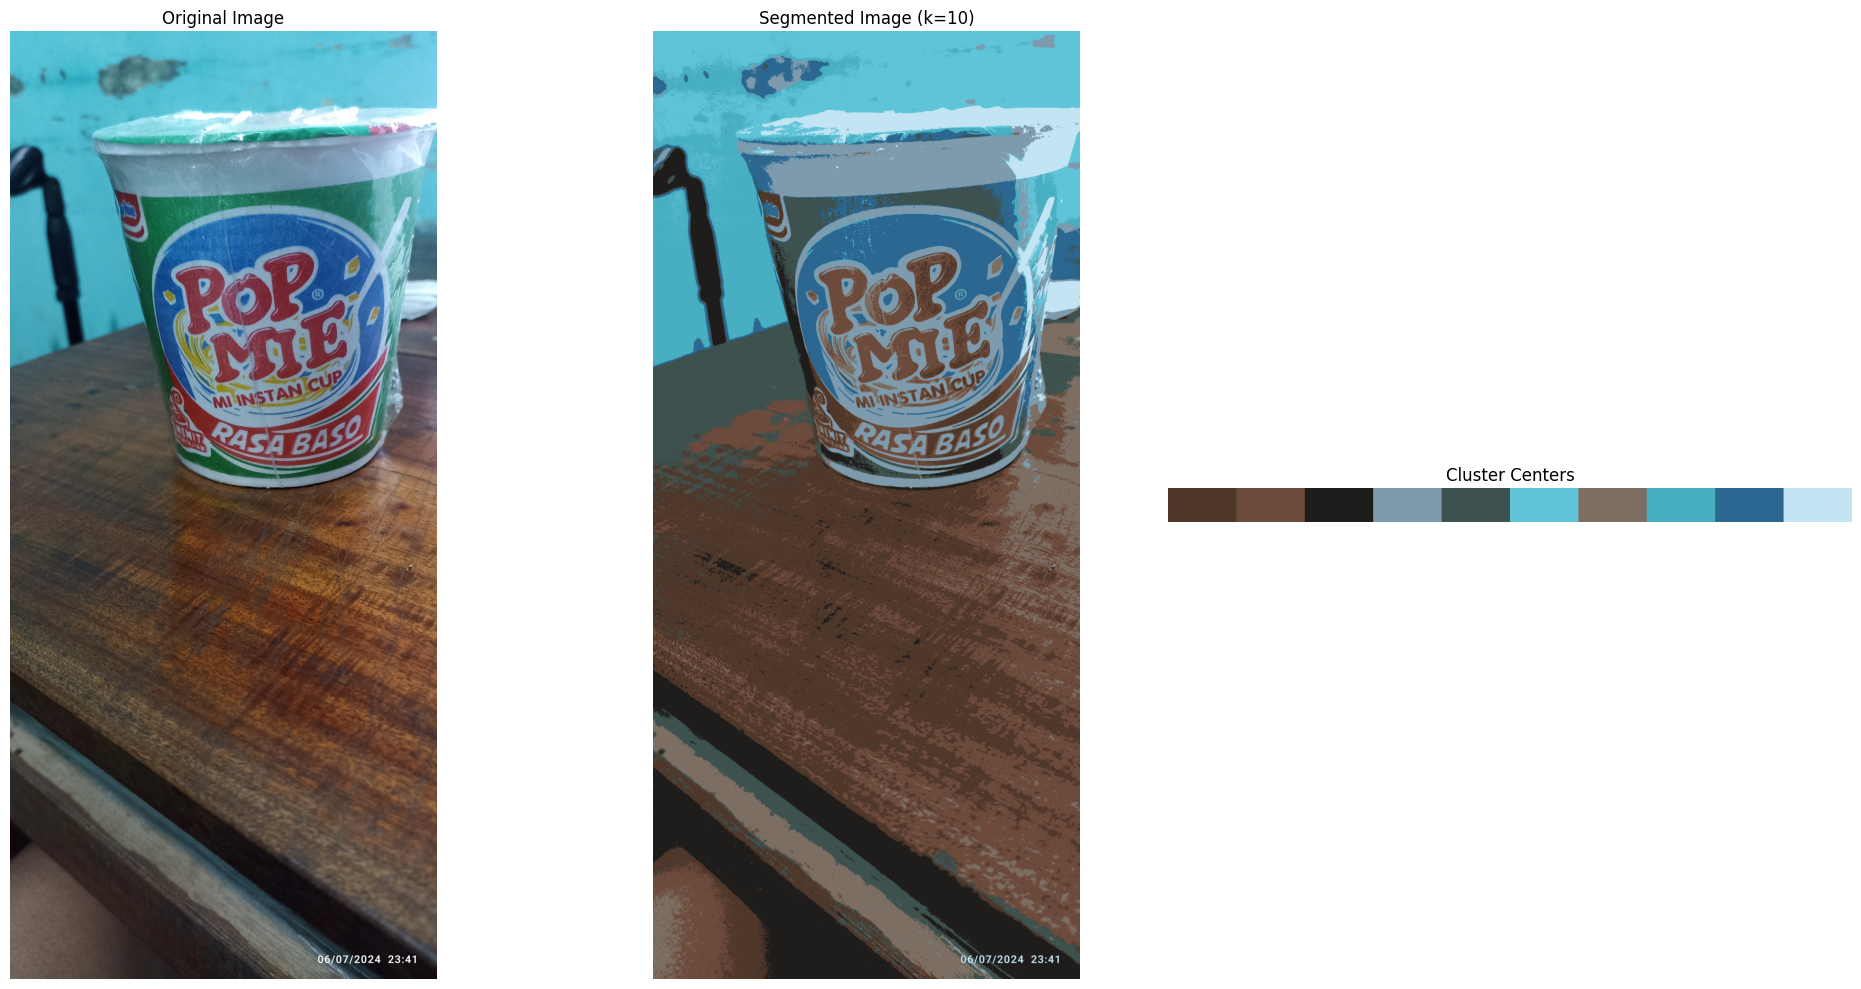

Original Image Size: (4624, 2080, 3)
Segmented Image Size: (4624, 2080, 3)

Cluster Details:
Cluster 6: 2326687 pixels (Color: [79 55 42])
Cluster 1: 1698797 pixels (Color: [109  75  60])
Cluster 9: 993018 pixels (Color: [30 29 28])
Cluster 5: 866299 pixels (Color: [126 155 174])
Cluster 7: 811379 pixels (Color: [61 81 78])
Cluster 4: 802530 pixels (Color: [ 96 196 217])
Cluster 3: 737889 pixels (Color: [124 110  98])
Cluster 0: 591280 pixels (Color: [ 72 174 193])
Cluster 2: 528636 pixels (Color: [ 43 103 144])
Cluster 8: 261405 pixels (Color: [195 229 243])


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

# Membaca gambar
image_path = 'img/popmie.jpg'
image = cv2.imread(image_path)

# Mengubah warna gambar dari BGR ke RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Membentuk ulang gambar menjadi susunan piksel 2D dan 3 nilai warna (RGB)
pixel_vals = image_rgb.reshape((-1, 3))

# Mengonversi ke tipe float
pixel_vals = np.float32(pixel_vals)

# Menentukan kriteria untuk k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Menjalankan k-means clustering
k = 10
_, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi data menjadi nilai 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Membentuk ulang data menjadi dimensi gambar asli
segmented_image = segmented_data.reshape((image_rgb.shape))

# Menampilkan gambar hasil clustering
plt.subplot(1, 3, 2)
plt.imshow(segmented_image)
plt.title(f'Segmented Image (k={k})')
plt.axis('off')

# Menampilkan warna kluster sebagai bar horizontal
color_counts = Counter(labels.flatten())
sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)

bar_height = 50
bar = np.zeros((bar_height, len(sorted_colors) * 100, 3), dtype=np.uint8)

for i, (cluster_num, count) in enumerate(sorted_colors):
    bar[:, i * 100:(i + 1) * 100] = centers[cluster_num]

plt.subplot(1, 3, 3)
plt.imshow(bar)
plt.title('Cluster Centers')
plt.axis('off')

plt.tight_layout()
plt.show()

# Menampilkan rincian kluster
print(f"Original Image Size: {image_rgb.shape}")
print(f"Segmented Image Size: {segmented_image.shape}")
print("\nCluster Details:")

for cluster_num, count in sorted_colors:
    print(f"Cluster {cluster_num}: {count} pixels (Color: {centers[cluster_num]})")
